## Required Libraries

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Importing data

In [2]:
df=pd.read_csv("Program_Choice.csv",index_col=0)

In [3]:
df.head()

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards
0,45,female,low,public,vocation,34,35,41,29,26,not enrolled,0
1,108,male,middle,public,vocation,34,33,41,36,36,not enrolled,0
2,15,male,high,public,vocation,39,39,44,26,42,not enrolled,0
3,67,male,low,public,vocation,37,37,42,33,32,not enrolled,0
4,153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0


## EDA

**Shape**

In [4]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  200 
no. of columns:  12


**Data type of data features**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   ses      200 non-null    object
 3   schtyp   200 non-null    object
 4   prog     200 non-null    object
 5   read     200 non-null    int64 
 6   write    200 non-null    int64 
 7   math     200 non-null    int64 
 8   science  200 non-null    int64 
 9   socst    200 non-null    int64 
 10  honors   200 non-null    object
 11  awards   200 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 20.3+ KB


**Null value Check**

In [6]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
df.isnull().sum()

id         0
female     0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
honors     0
awards     0
dtype: int64

Droping "id" as it is insignificant

In [7]:
df.drop("id",axis=1,inplace =True)

**Making different list for categorical columns and numerical columns**


In [8]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['female', 'ses', 'schtyp', 'prog', 'honors']
['read', 'write', 'math', 'science', 'socst', 'awards']


#### Describe for numerical and categorical columns


In [9]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
read,200.0,52.230,10.252937,28.0,44.00,50.0,60.0,76.0
write,200.0,52.775,9.478586,31.0,45.75,54.0,60.0,67.0
math,200.0,52.645,9.368448,33.0,45.00,52.0,59.0,75.0
science,200.0,51.850,9.900891,26.0,44.00,53.0,58.0,74.0
socst,200.0,52.405,10.735793,26.0,46.00,52.0,61.0,71.0
awards,200.0,1.670,1.818691,0.0,0.00,1.0,2.0,7.0


In [10]:
df[cat].describe().T

,count,unique,top,freq
female,200,2,female,109
ses,200,3,middle,95
schtyp,200,2,public,168
prog,200,2,academic,105
honors,200,2,not enrolled,147


**Are there any duplicate records, Check for duplicate data**

In [11]:

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards


In [12]:
## df.drop_duplicates(inplace=True) If present we can drop them like this

### unique values for categorical variables

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

FEMALE :  2
male       91
female    109
Name: female, dtype: int64


SES :  3
low       47
high      58
middle    95
Name: ses, dtype: int64


SCHTYP :  2
private     32
public     168
Name: schtyp, dtype: int64


PROG :  2
vocation     95
academic    105
Name: prog, dtype: int64


HONORS :  2
enrolled         53
not enrolled    147
Name: honors, dtype: int64




### Univariate Analysis - Graphics

In [14]:
# fig, axes = plt.subplots(nrows=4,ncols=2)
# fig.set_size_inches(10,20)
# a = sns.distplot(df['read'] , ax=axes[0][0])
# a.set_title("read Distribution",fontsize=10)

# a = sns.boxplot(df['read'] , orient = "v" , ax=axes[0][1])
# a.set_title("read Boxplot",fontsize=10)

# a = sns.distplot(df['write'] , ax=axes[1][0])
# a.set_title("write Distribution",fontsize=10)

# a = sns.boxplot(df['write'] , orient = "v" , ax=axes[1][1])
# a.set_title("write Boxplot",fontsize=10)


# a = sns.distplot(df['math'] , ax=axes[2][0])
# a.set_title("math Distribution",fontsize=10)

# a = sns.boxplot(df['math'] , orient = "v" , ax=axes[2][1])
# a.set_title("math Boxplot",fontsize=10)


# a = sns.distplot(df['science'] , ax=axes[3][0])
# a.set_title("science Distribution",fontsize=10)

# a = sns.boxplot(df['science'] , orient = "v" , ax=axes[3][1])
# a.set_title("science Boxplot",fontsize=10)

# plt.show()

In [15]:
# fig, axes = plt.subplots(nrows=3,ncols=2)
# fig.set_size_inches(10,18)
# a = sns.distplot(df['socst'] , ax=axes[0][0])
# a.set_title("socst Distribution",fontsize=10)

# a = sns.boxplot(df['socst'] , orient = "v" , ax=axes[0][1])
# a.set_title("socst Boxplot",fontsize=10)

# a = sns.distplot(df['awards'] , ax=axes[1][0])
# a.set_title("awards Distribution",fontsize=10)

# a = sns.boxplot(df['awards'] , orient = "v" , ax=axes[1][1])
# a.set_title("awards Boxplot",fontsize=10)

# a = sns.distplot(df['cid'] , ax=axes[2][0])
# a.set_title("cid Distribution",fontsize=10)

# a = sns.boxplot(df['cid'] , orient = "v" , ax=axes[2][1])
# a.set_title("cid Boxplot",fontsize=10)
# plt.show()

###  Bivariate Analysis - Graphics

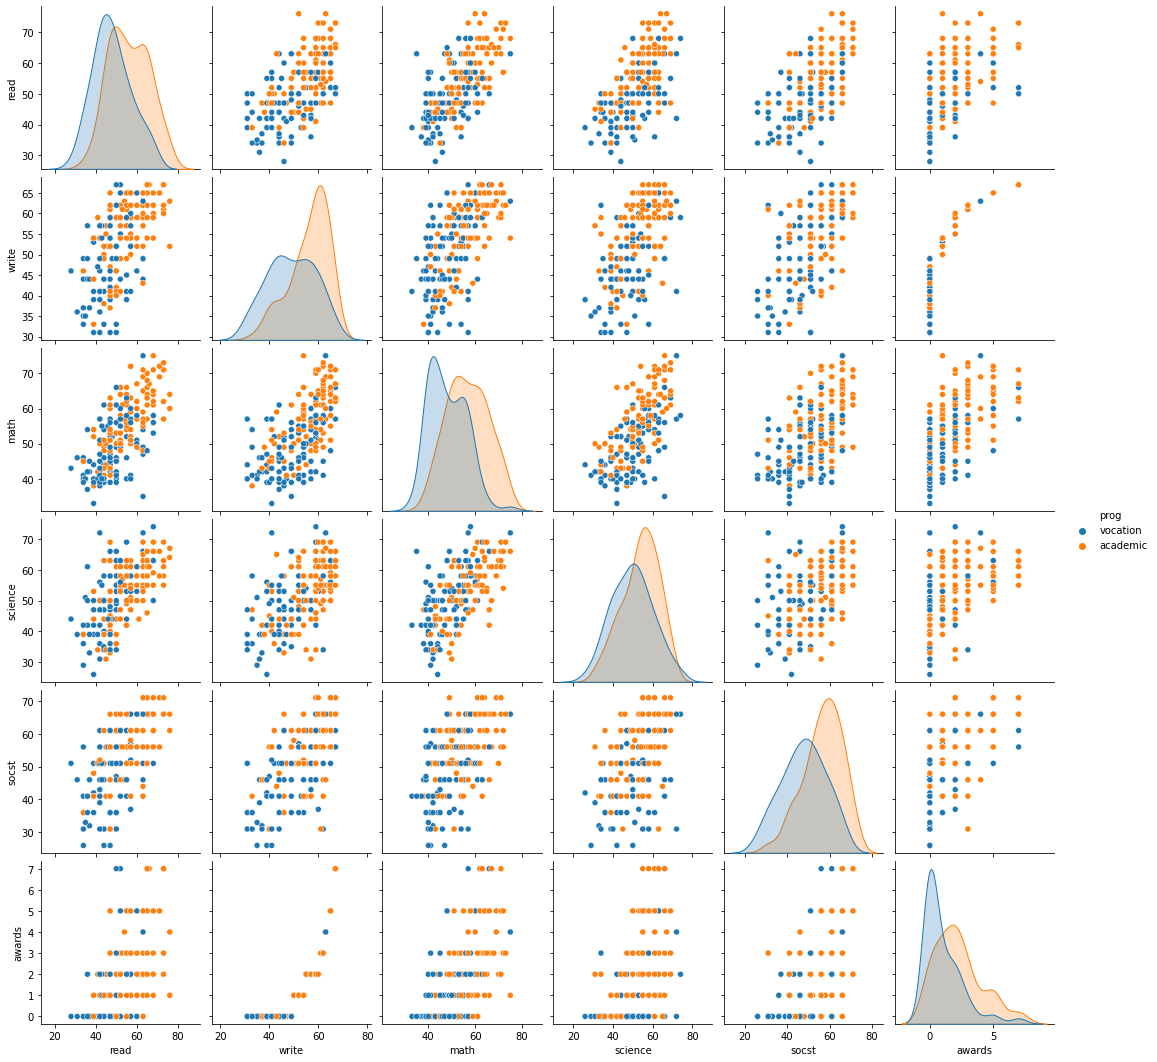

In [16]:
sns.pairplot(df,hue="prog");

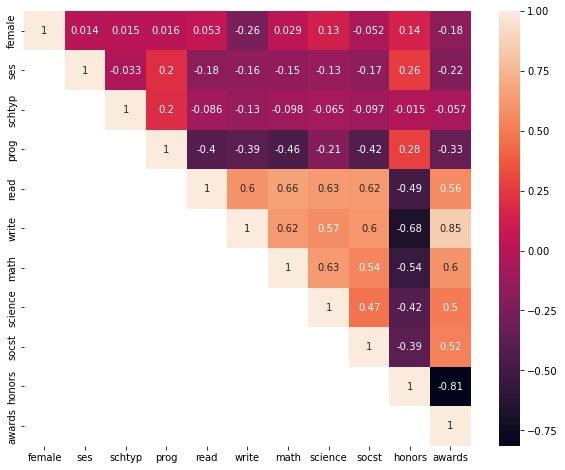

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,mask=np.tril(df.corr(),-1))
plt.show()

#### Outlier Check

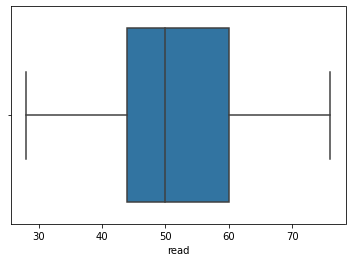

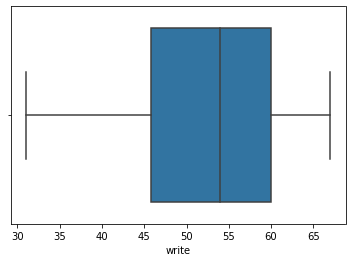

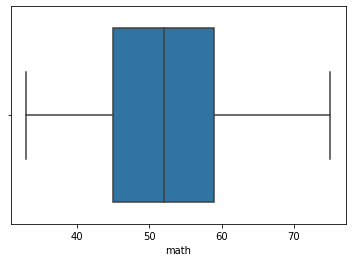

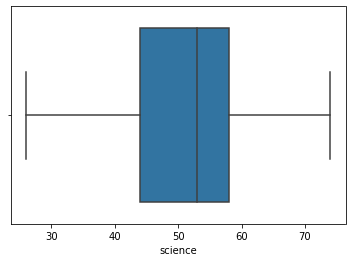

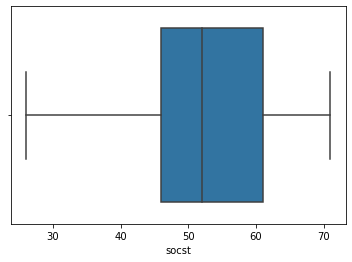

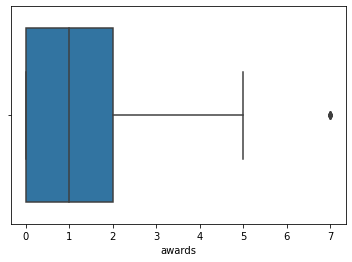

In [18]:
# construct box plot for continuous variables
for i in num:
    sns.boxplot(x=i, data=df)
    plt.show()

#### New way of encoding the categorical columns

In [19]:
## Excluding prog from the cat variable

cat1 = ['female', 'ses', 'schtyp', 'honors']

In [20]:
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in cat1: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [21]:
df

,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards
0,0,1,1,vocation,34,35,41,29,26,1,0
1,1,2,1,vocation,34,33,41,36,36,1,0
2,1,0,1,vocation,39,39,44,26,42,1,0
3,1,1,1,vocation,37,37,42,33,32,1,0
4,1,2,1,vocation,39,31,40,39,51,1,0
...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,1,academic,63,65,71,69,71,0,5
196,1,2,1,vocation,63,63,75,72,66,0,4
197,1,2,1,academic,73,67,71,63,66,0,7
198,0,2,1,academic,71,65,72,66,56,0,5


In [22]:
## Treating the dependent variable
from sklearn.preprocessing import LabelEncoder

In [23]:
LE = LabelEncoder()

In [24]:
LE.fit_transform(df['prog'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [25]:
df['prog'] = LE.fit_transform(df['prog'])
df

,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards
0,0,1,1,1,34,35,41,29,26,1,0
1,1,2,1,1,34,33,41,36,36,1,0
2,1,0,1,1,39,39,44,26,42,1,0
3,1,1,1,1,37,37,42,33,32,1,0
4,1,2,1,1,39,31,40,39,51,1,0
...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,1,0,63,65,71,69,71,0,5
196,1,2,1,1,63,63,75,72,66,0,4
197,1,2,1,0,73,67,71,63,66,0,7
198,0,2,1,0,71,65,72,66,56,0,5


In [26]:
df['prog'].value_counts(1)

0    0.525
1    0.475
Name: prog, dtype: float64

In [27]:
# Arrange data into independent variables and dependent variables
X = df.drop("prog",axis=1)  ## Features
y = df["prog"]  ## Target

In [28]:
# Split X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1,stratify = y)

In [29]:
print(y_train.value_counts(1))
print(y_test.value_counts(1))

0    0.525
1    0.475
Name: prog, dtype: float64
0    0.525
1    0.475
Name: prog, dtype: float64


### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
LR = LogisticRegression(max_iter=100000000000)

In [32]:
## Training data score and model fitting
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.7625

In [33]:
## Test data scoring
LR.score(X_test,y_test)

0.6

In [34]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut

In [35]:
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[1,2,3,4,5,6]}

In [36]:
LR_tune = GridSearchCV(estimator=LR,
                      param_grid=parameters,
                      cv=LeaveOneOut(),
                      n_jobs=-1)
LR_tune.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(),
             estimator=LogisticRegression(max_iter=100000000000), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [37]:
LR_tune.best_params_

{'C': 1, 'penalty': 'none'}

In [38]:
LR_tune.best_estimator_.score(X_train,y_train)

0.775

In [39]:
metrics.confusion_matrix(y_true=y_train,y_pred=LR_tune.best_estimator_.predict(X_train))

array([[68, 16],
       [20, 56]], dtype=int64)

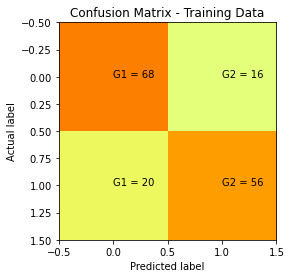

In [40]:
cm = metrics.confusion_matrix(y_true=y_train,y_pred=LR_tune.best_estimator_.predict(X_train))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Training Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [41]:
## Model evaluation on the test data

print(metrics.classification_report(y_true=y_test,y_pred=LR_tune.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53        21
           1       0.56      0.79      0.65        19

    accuracy                           0.60        40
   macro avg       0.62      0.61      0.59        40
weighted avg       0.63      0.60      0.59        40



### LDA/QDA

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [43]:
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()

In [44]:
parameters_LDA = {'solver':['svd', 'lsqr', 'eigen']}

In [45]:
LDA_tune = GridSearchCV(estimator=LDA,
                      param_grid=parameters_LDA,
                      cv=LeaveOneOut(),
                      n_jobs=-1)
LDA_tune.fit(X_train,y_train)

print(LDA_tune.best_params_)
print(LDA_tune.best_estimator_.score(X_train,y_train))
print(LDA_tune.best_estimator_.score(X_test,y_test))

{'solver': 'svd'}
0.75
0.575


In [46]:
## Model evaluation on the test data

print(metrics.classification_report(y_true=y_test,y_pred=LDA_tune.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.43      0.51        21
           1       0.54      0.74      0.62        19

    accuracy                           0.57        40
   macro avg       0.59      0.58      0.57        40
weighted avg       0.59      0.57      0.57        40



In [47]:
QDA_model = QDA.fit(X_train,y_train)
QDA_model.score(X_train,y_train)

0.79375

In [48]:
## Model evaluation on the test data

print(metrics.classification_report(y_true=y_test,y_pred=QDA_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.64      0.74      0.68        19

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40



### Gaussian Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [50]:
GNB_model = GaussianNB()
#BN_NB = BernoulliNB()

In [51]:
X_train

,female,ses,schtyp,read,write,math,science,socst,honors,awards
97,0,2,0,50,52,53,55,56,1,1
13,0,2,1,36,44,37,42,41,1,0
4,1,2,1,39,31,40,39,51,1,0
46,0,2,1,47,46,39,47,61,1,0
17,0,2,1,42,46,38,36,46,1,0
...,...,...,...,...,...,...,...,...,...,...
169,1,0,1,68,59,56,63,66,1,2
90,0,0,1,50,52,45,58,36,1,1
136,1,2,1,60,54,60,55,66,1,1
138,1,1,1,63,43,59,65,44,1,0


In [52]:
m_3 = GNB_model.fit(X_train[['read','write','math','science','socst']],y_train)

In [53]:
y_train_predict = m_3.predict(X_train[['read','write','math','science','socst']])
model_score = m_3.score(X_train[['read','write','math','science','socst']], y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.75
[[65 19]
 [21 55]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        84
           1       0.74      0.72      0.73        76

    accuracy                           0.75       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.75      0.75      0.75       160



In [54]:
# m_3 = GNB_model.fit(X_train,y_train)
# y_train_predict = m_3.predict(X_train)
# model_score = m_3.score(X_train, y_train)                      ## Accuracy
# print(model_score)
# print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
# print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

In [55]:
## Performance Matrix on test data set
y_test_predict = m_3.predict(X_test[['read','write','math','science','socst']])
model_score = m_3.score(X_test[['read','write','math','science','socst']], y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.6
[[11 10]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        21
           1       0.57      0.68      0.62        19

    accuracy                           0.60        40
   macro avg       0.61      0.60      0.60        40
weighted avg       0.61      0.60      0.60        40



### KNN Model

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
KNN = KNeighborsClassifier()

In [58]:
param_grid_KNN = {'n_neighbors':[2,5,8,10]}

KNN_tune_us = GridSearchCV(estimator=KNN,
                          param_grid=param_grid_KNN,
                          cv=LeaveOneOut(),
                          n_jobs=-1)
KNN_tune_us.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 5, 8, 10]})

In [59]:
KNN_tune_us.best_params_

{'n_neighbors': 10}

In [60]:
print(KNN_tune_us.best_estimator_.score(X_train,y_train))
print(KNN_tune_us.best_estimator_.score(X_test,y_test))

0.75625
0.55


In [61]:
print(metrics.classification_report(y_true=y_test,y_pred=KNN_tune_us.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55        21
           1       0.52      0.58      0.55        19

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



In [62]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [63]:
X.head()

,female,ses,schtyp,read,write,math,science,socst,honors,awards
0,0,1,1,34,35,41,29,26,1,0
1,1,2,1,34,33,41,36,36,1,0
2,1,0,1,39,39,44,26,42,1,0
3,1,1,1,37,37,42,33,32,1,0
4,1,2,1,39,31,40,39,51,1,0


In [64]:
X_train['read'] = SC.fit_transform(X_train[['read']])
X_train['write'] = SC.fit_transform(X_train[['write']])
X_train['math'] = SC.fit_transform(X_train[['math']])
X_train['science'] = SC.fit_transform(X_train[['science']])
X_train['socst'] = SC.fit_transform(X_train[['socst']])

C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_15356/2636788461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['read'] = SC.fit_transform(X_train[['read']])
C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_15356/2636788461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['write'] = SC.fit_transform(X_train[['write']])
C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_15356/2636788461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [65]:
X_test['read'] = SC.fit_transform(X_test[['read']])
X_test['write'] = SC.fit_transform(X_test[['write']])
X_test['math'] = SC.fit_transform(X_test[['math']])
X_test['science'] = SC.fit_transform(X_test[['science']])
X_test['socst'] = SC.fit_transform(X_test[['socst']])

C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_15356/3809237991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['read'] = SC.fit_transform(X_test[['read']])
C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_15356/3809237991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['write'] = SC.fit_transform(X_test[['write']])
C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_15356/3809237991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [66]:
from IPython.display import display

In [67]:
display(X_train)
display(X_test)

,female,ses,schtyp,read,write,math,science,socst,honors,awards
97,0,2,0,-0.244895,-0.137074,-0.030196,0.258629,0.292597,1,1
13,0,2,1,-1.589419,-0.976567,-1.710641,-1.028328,-1.106275,1,0
4,1,2,1,-1.301306,-2.340744,-1.395558,-1.325317,-0.173693,1,0
46,0,2,1,-0.533007,-0.766694,-1.500585,-0.533344,0.758888,1,0
17,0,2,1,-1.013194,-0.766694,-1.605613,-1.622307,-0.639984,1,0
...,...,...,...,...,...,...,...,...,...,...
169,1,0,1,1.483777,0.597483,0.284888,1.050602,1.225179,1,2
90,0,0,1,-0.244895,-0.137074,-0.870418,0.555619,-1.572566,1,1
136,1,2,1,0.715478,0.072800,0.704999,0.258629,1.225179,1,1
138,1,1,1,1.003591,-1.081504,0.599972,1.248595,-0.826500,1,0


,female,ses,schtyp,read,write,math,science,socst,honors,awards
170,1,1,1,0.433589,0.944982,1.593744,2.247227,-0.437615,1,2
112,0,2,1,0.433589,0.379125,1.963666,-0.896562,0.518921,1,1
29,0,1,1,-0.744061,-0.073561,-1.119012,-1.245872,0.040653,1,1
39,1,2,0,-0.422883,-0.413076,-1.119012,-0.896562,0.040653,1,0
115,1,2,0,-0.422883,0.718639,0.853902,0.966424,-0.437615,1,2
85,0,1,1,-0.101706,-0.526247,0.360673,0.384241,1.475456,1,0
44,0,1,1,-1.279356,-0.752590,0.237366,-0.663689,-0.246308,1,0
7,1,2,1,-0.101706,-2.223820,-1.242319,-1.828055,-1.872418,1,0
54,0,2,0,-0.744061,0.152782,-0.872398,-0.663689,0.040653,1,1
177,0,1,1,1.504180,1.624011,1.717052,0.966424,1.953724,0,5


In [68]:
param_grid_KNN = {'n_neighbors':[2,5,8,10],'p':[1,2,3,4]}

KNN_tune_scaled = GridSearchCV(estimator=KNN,
                          param_grid=param_grid_KNN,
                           scoring='f1',
                          cv=LeaveOneOut(),
                          n_jobs=-1)
KNN_tune_scaled.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 5, 8, 10], 'p': [1, 2, 3, 4]},
             scoring='f1')

In [69]:
KNN_tune_scaled.best_params_

{'n_neighbors': 5, 'p': 4}

In [70]:
print(KNN_tune_scaled.best_estimator_.score(X_train,y_train))
print(KNN_tune_scaled.best_estimator_.score(X_test,y_test))

0.825
0.625


In [71]:
## Performance Matrix on test data set
print(metrics.classification_report(y_true=y_test,y_pred=KNN_tune_scaled.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        21
           1       0.59      0.68      0.63        19

    accuracy                           0.62        40
   macro avg       0.63      0.63      0.62        40
weighted avg       0.63      0.62      0.62        40



### SVM

In [72]:
from sklearn.svm import SVC

In [73]:
svc = SVC()

In [74]:
param_svc = {'C':[1,2,3,4,5],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[3,4,5]}

In [75]:
svc_gridsearch = GridSearchCV(estimator=svc,
                             param_grid=param_svc,
                             cv=LeaveOneOut(),
                              scoring='recall',
                             n_jobs=-1)

svc_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall')

In [76]:
svc_gridsearch.best_params_

{'C': 1, 'degree': 3, 'kernel': 'sigmoid'}

In [77]:
print(svc_gridsearch.best_estimator_.score(X_train,y_train))
print(svc_gridsearch.best_estimator_.score(X_test,y_test))

0.71875
0.675


In [78]:
## Performance Matrix on test data set
print(metrics.classification_report(y_true=y_test,y_pred=svc_gridsearch.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.52      0.63        21
           1       0.62      0.84      0.71        19

    accuracy                           0.68        40
   macro avg       0.70      0.68      0.67        40
weighted avg       0.70      0.68      0.67        40



# END